### TODO:
* Subdividir 'Country' em menos categorias
* Fazer plots do income level para várias features
* Remover fnlwgt
* Transformar variáveis não-numéricas em numérias: Capital Gain, Capitalo Loss, ...
* Realmente utilizar o kNN.

In [1]:
## imports:
# básicos
import os
import numpy as np
# data
import pandas as pd
import sklearn as sk
# plots
from matplotlib import pyplot as plt
from matplotlib import colors
## stylish plots (comentar caso não tenha LaTeX)
def matplotlib_latex():
    from matplotlib import rc
    plt.style.use('bmh')
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)
#matplotlib_latex()

In [2]:
def cute_hist(ax, x, title='',
              xlabel='', ylabel='',
              cmap='viridis', fontsize=14,
              func=lambda x: x*x, df=False, show=True):
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize+2)
    if not df:
        bins = x.max() - x.min()
        n, bin_array, patches = ax.hist(x, bins)
    else:
        x.plot(kind='bar', ax=ax)
        n = x.to_numpy()
        patches = ax.patches
    fracs = func(n/n.max())
    norm = colors.Normalize(0, 1)
    cm = plt.cm.get_cmap(name=cmap)
    for frac, patch in zip(fracs, patches):
        color = cm(norm(frac))
        patch.set_facecolor(color)
    if show:
        plt.show()
    

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


def cute_pie(ax, x, title='',
            cmap='bwr', fontsize=14,
             func=lambda x: x*x, show=True):
    ax.set_title(title, fontsize=fontsize)
    n =  x.to_numpy()
    n_norm = n/n.max()
    fracs = func(n_norm)
    ax.pie(x, autopct=make_autopct(     x), shadow=True, labels=x.index,
           startangle=90, explode=0.1*n_norm)
    patches = ax.patches
    norm = colors.Normalize(0, 1)
    cm = plt.cm.get_cmap(name=cmap)
    for frac, patch in zip(fracs, patches):
        color = cm(norm(frac))
        patch.set_facecolor(color)
    if show:
        plt.show()

In [3]:
data_csv = os.getcwd() + "/train_data.csv" # os.getcwd() gets the current directory $(pwd)
features=["ID", "Age", "Workclass", "fnlwgt", "Education",
    "Education Number", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country",
    "Income"]
a = pd.read_csv(data_csv, names=features,
    sep=',', engine='python', na_values='?',
    header=0)
a

,ID,Age,Workclass,fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32556,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32557,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32558,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K


In [4]:
a['Income'].value_counts()

<=50K    24719
>50K      7841
Name: Income, dtype: int64

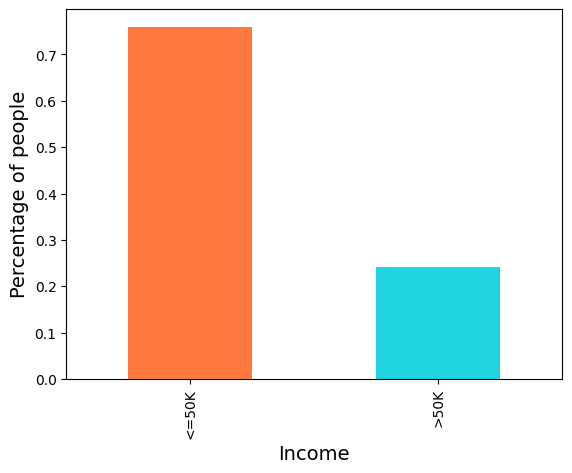

In [5]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Income'].value_counts()/sum(a['Income'].value_counts()), df=True,
          xlabel='Income', ylabel='Percentage of people', cmap='rainbow', func=lambda x: np.sin(x))

In [6]:
a["Country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

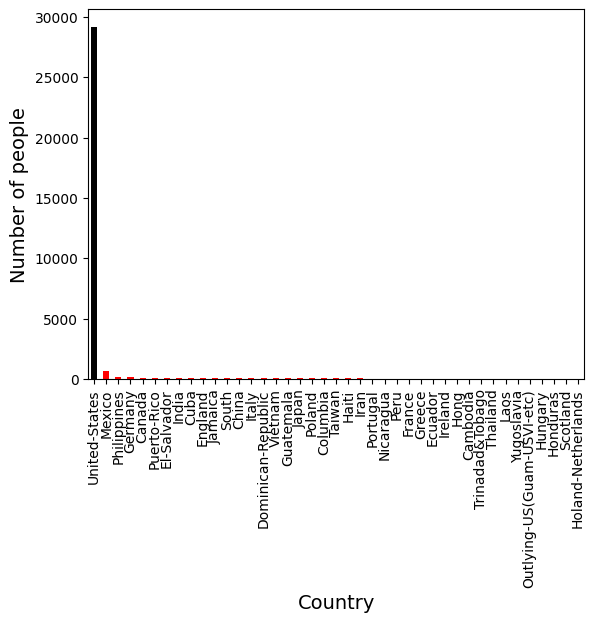

In [7]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Country'].value_counts(),
          xlabel='Country', ylabel='Number of people', df=True, cmap='flag')

#### We therefore subdivide Country in less categories

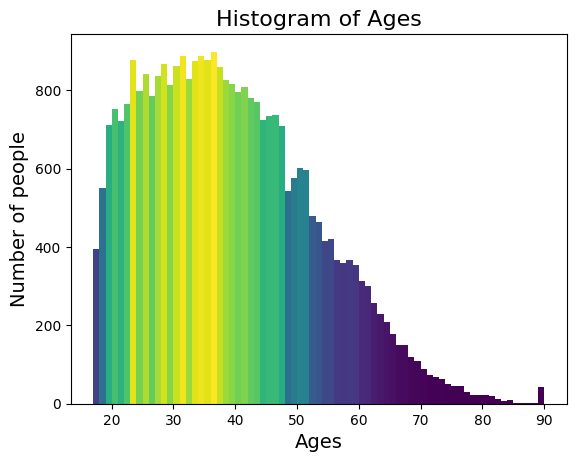

In [8]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Age'], title='Histogram of Ages',
          xlabel='Ages', ylabel='Number of people')

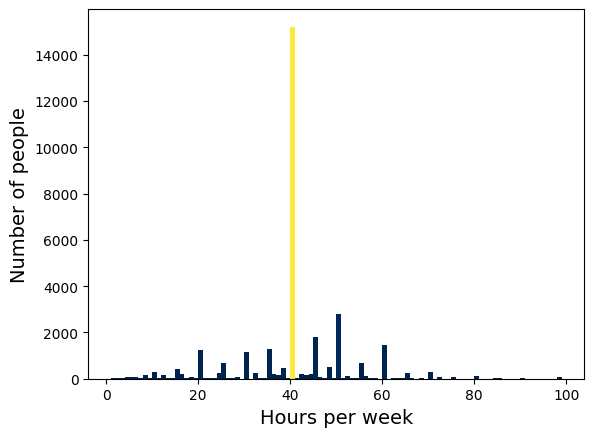

In [9]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Hours per week'], cmap='cividis',
          xlabel='Hours per week', ylabel='Number of people')

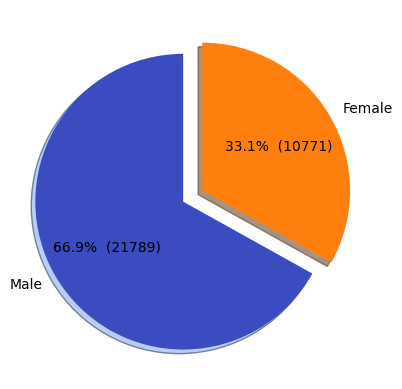

In [10]:
fig, ax1 = plt.subplots()
cute_pie(ax1, a['Sex'].value_counts(), cmap='coolwarm',
        func=lambda x: 1-x**0.3, show=False)

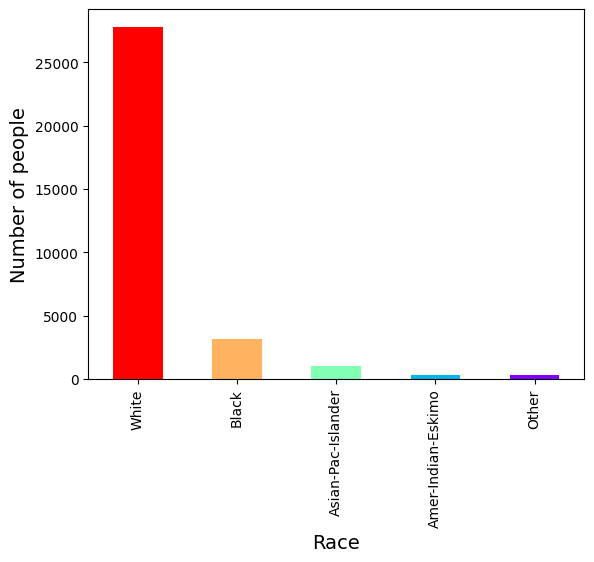

In [11]:
fig, ax1=plt.subplots()
cute_hist(ax=ax1,x=a['Race'].value_counts(), title='', cmap='rainbow',
          xlabel='Race', ylabel='Number of people',df=True, func=lambda x: np.linspace(1,0,len(x)))

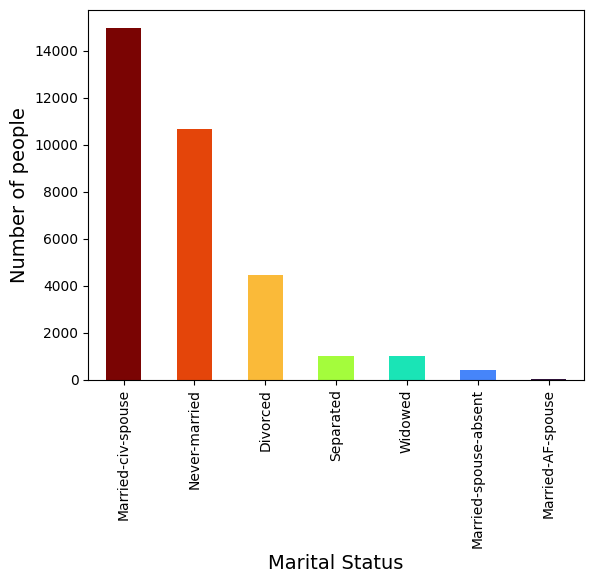

In [12]:
fig, ax1=plt.subplots()
cute_hist(ax=ax1,x=a['Marital Status'].value_counts(), title='', cmap='turbo',
          xlabel='Marital Status', ylabel='Number of people', df=True, func=lambda x: np.linspace(1,0,len(x)))

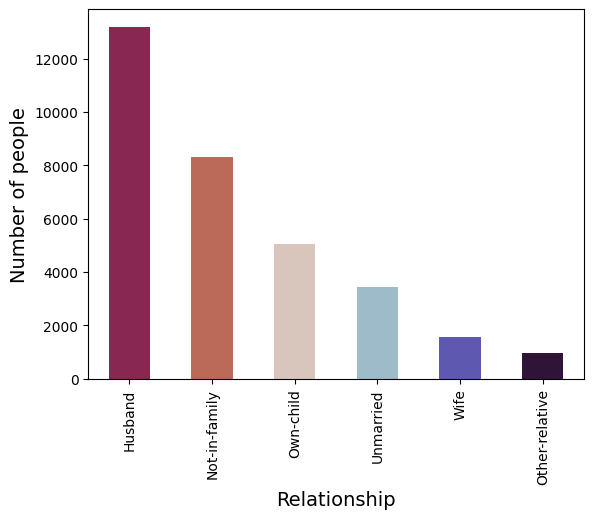

In [13]:
fig, ax1=plt.subplots()
cute_hist(ax=ax1,x=a['Relationship'].value_counts(), title='', cmap='twilight_shifted',
          xlabel='Relationship', ylabel='Number of people', df=True,
          func=lambda x: np.sin(np.linspace(1,0,len(x))))

#### We can see below that 'Education' and 'Education Number' are actually the same feature.

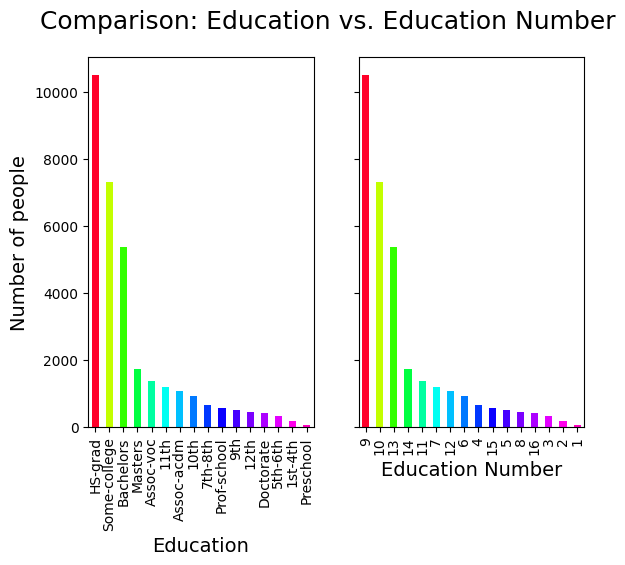

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

cute_hist(ax=ax1, x=a['Education'].value_counts(), title='',
          xlabel='Education', ylabel='Number of people',
          cmap='gist_rainbow', df=True, show=False,
          func=lambda x: np.sqrt(np.linspace(0, 1, num=len(x))))

cute_hist(ax=ax2, x=a['Education Number'].value_counts(), title='',
          xlabel='Education Number', ylabel='Number of people',
          cmap='gist_rainbow', df=True, show=False,
          func=lambda x: np.sqrt(np.linspace(0, 1, num=len(x))))

fig.suptitle('Comparison: Education vs. Education Number', fontsize=18)
plt.show()

#### We are going to use `Education Number`, removing the `Education` feature.

In [15]:
a.drop(columns='Education');

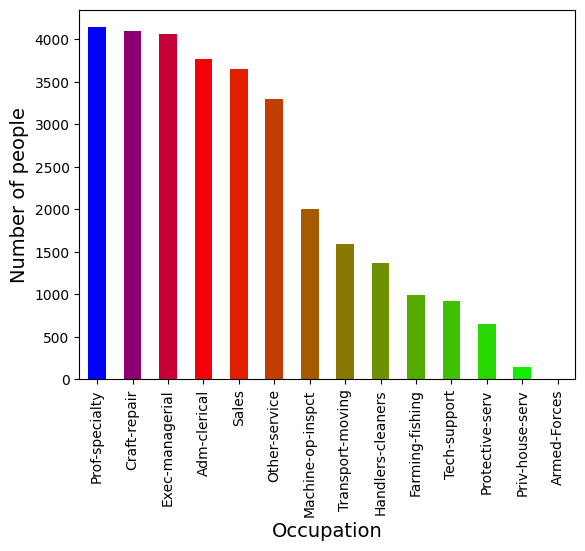

In [16]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Occupation'].value_counts(),
          xlabel='Occupation', ylabel='Number of people',
          cmap='brg', df=True,
          func=lambda x: np.sqrt(np.linspace(0, 1, num=len(x))))

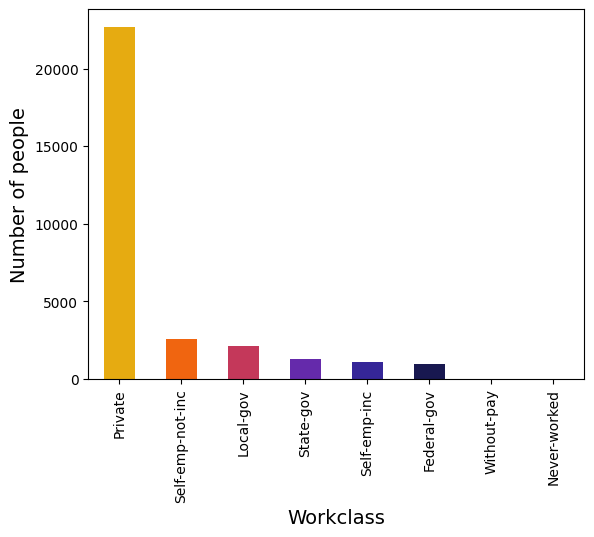

In [17]:
fig, ax1=plt.subplots()
cute_hist(ax=ax1,x=a['Workclass'].value_counts(), title='', cmap='CMRmap',
          xlabel='Workclass', ylabel='Number of people', df=True,
          func=lambda x: np.sin(np.linspace(1,0,len(x)))**2)

In [18]:
adult = a.dropna();
adult.shape

(30161, 16)